In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#set a random number seed
np.random.seed(119)

#set number of data points
npoints = 50

#set x
x = np.linspace(0,10.,npoints)

#set slope, intercept, & scatter rms
m = 2.0
b = 1.0
sigma = 2.0

#generate y points
y = m*x + b + np.random.normal(scale=sigma,size=npoints)
y_err = np.full(npoints,sigma)

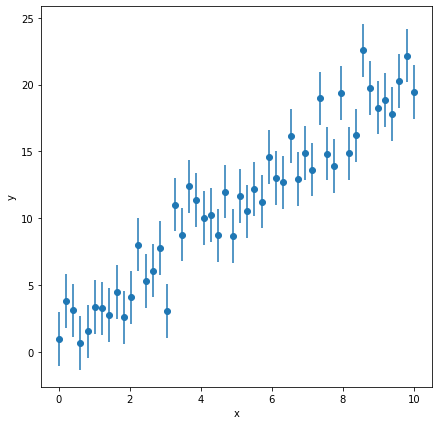

In [3]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("lin_reg.png")

In [4]:
#Method 1 polyfit(
m_fit, b_fit = np.poly1d(np.polyfit(x, y, 1, w=1./y_err)) #weight with uncertainties
print(m_fit,b_fit)

y_fit = m_fit * x + b_fit

1.9634043470399505 1.283010681296193


In [5]:
m_A = 0.0
m_B = 0.0
m_C = 0.0
m_D = 0.0

m_A = np.sum(x*y)
m_B = np.sum(x)*np.sum(y)
m_C = np.sum(x*x)
m_B = np.sum(x)**2

m_fit_lr = (float(npoints)*m_A-m_B)/(float(npoints)*m_C - m_D)

y_mean = np.mean(y)
x_mean = np.mean(x)

b_fit_lr = y_mean - m_fit_lr*x_mean

y_fit_lr = m_fit_lr * x + b_fit_lr

print(m_fit_lr,b_fit_lr)

1.4114877512324169 4.042593660333869


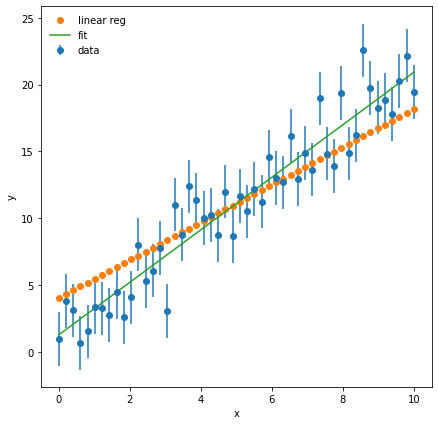

In [6]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label = 'data')
plt.plot(x,y_fit_lr,'o',label='linear reg')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=False)
plt.savefig("linear_regression.png")